<b><font size="25" color='red'>Import The Main Libraries</font></b>


In [1]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# other
import missingno as msno
import os

 <b><font size="25" color='red'>Load The DataSet</font></b>


In [2]:
## Read the Csv file
data = pd.read_csv("../input/california-housing-prices/housing.csv")

In [3]:
df_housing=data.copy()

<b><font size="25" color='red'>Inspect The Data</font></b>


In [4]:
# Show the head of the dataFrame 
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Check info
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
## Some statistics on data 
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
## check nulls of data 
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# comment

* > Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature 


<b><font size="25" color='red'> Exploratory Data Analysis (EDA)</font></b>


In [8]:
# Explore the column ocean_proximity
ocean_values = df_housing["ocean_proximity"].value_counts()
ocean_values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

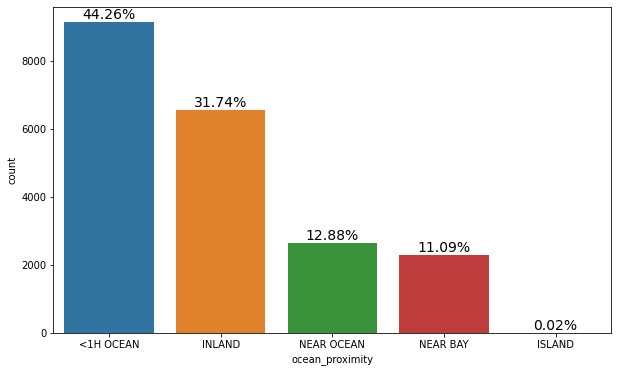

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=df_housing,order=ocean_values.index)

# showing the percenotge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 


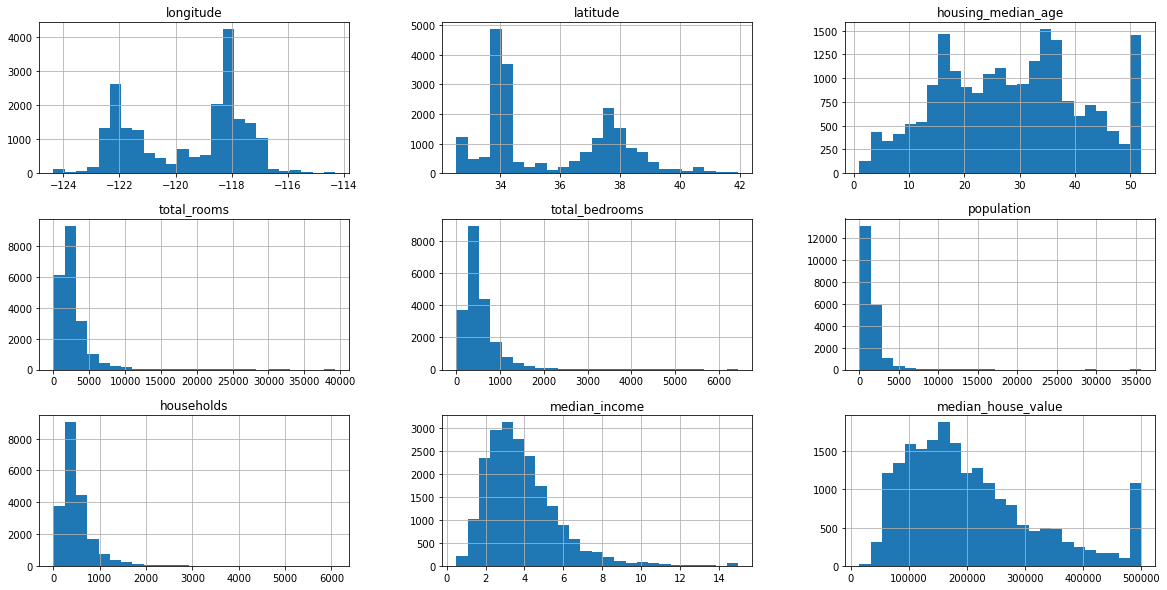

In [10]:
# Histogram
df_housing.hist(bins=25,figsize=(20,10));

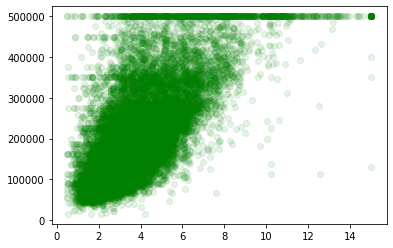

In [11]:
# check scatter plot between median_income and median_house_value
plt.scatter(df_housing["median_income"],df_housing["median_house_value"], alpha=0.1,color="g")

In [12]:
## Try to make median_income into bins
income_bins = pd.cut(df_housing["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])

<AxesSubplot:xlabel='median_income', ylabel='count'>

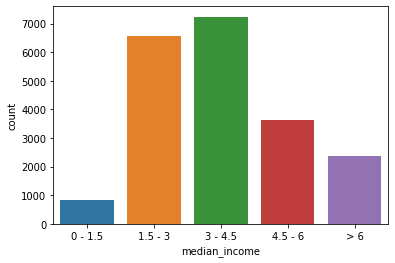

In [13]:
sns.countplot(x = income_bins)

# Comment 
* >  It seems that the (1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later,

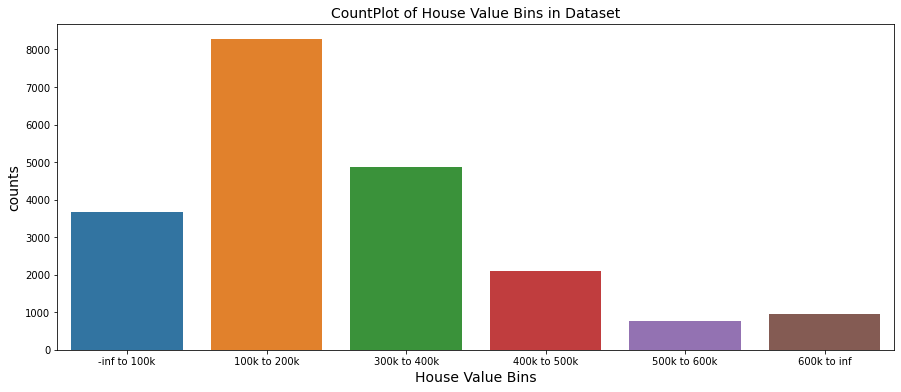

In [14]:
## Try for (median_house_vaLue) to convert it to chunks (bins) 
## Cut this numericaL feature to categorical for its vaLues to be in range will be in the some category 
## In the foLLowing example -- any value between range (0-100k) will be the same category,I name it (0-100k) 

house_value_bins = pd.cut(x=df_housing["median_house_value"],
                          bins=(-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf),
                                labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k to inf') )
## countpLot for the above chunks 
plt.figure(figsize=(15,6)) 
sns.countplot(x=house_value_bins) 
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k') 
plt.xlabel('House Value Bins', fontsize=14, c='k') 
plt.ylabel('counts', fontsize=14,c='k') 
plt.show() 


# Comment

* > The majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical' 

<b><font size="20" color='red'>Bivariate visualization</font></b>


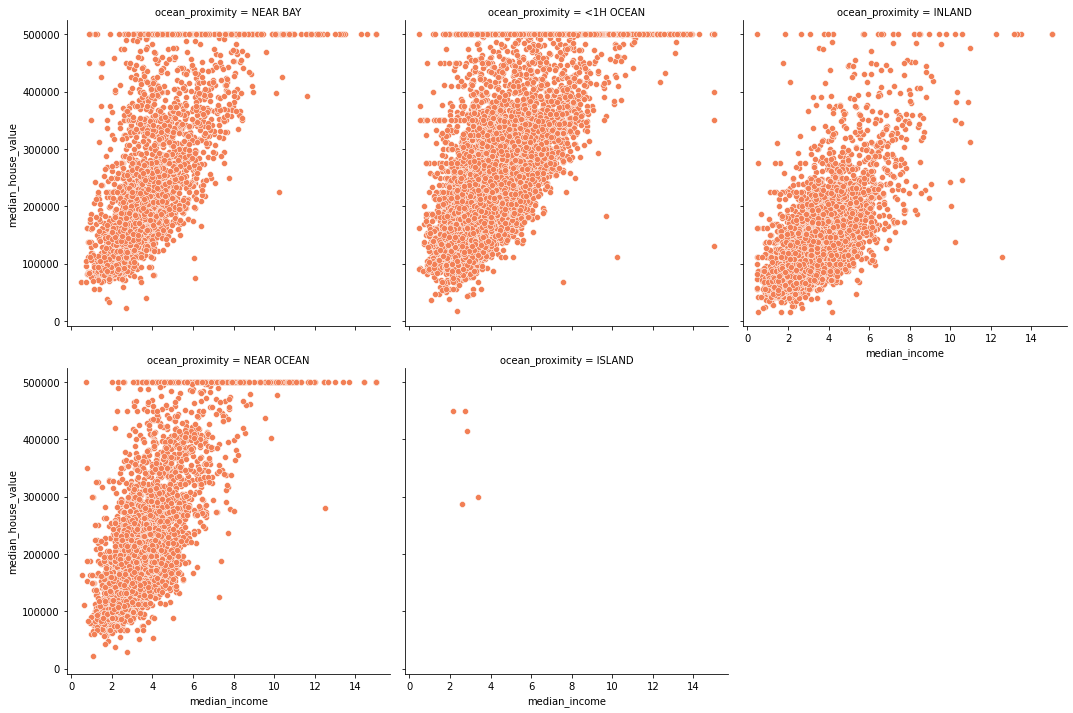

In [15]:
# Scatter plot between median_income and median_house_value at each ocean_proximity
sns.relplot(x="median_income",y='median_house_value',data=df_housing,col="ocean_proximity",col_wrap=3,color="#F27F55")

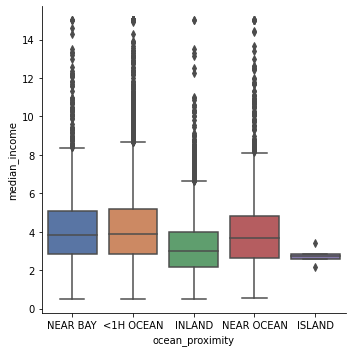

In [16]:
## Boxplot between ocean_proximity and median_income
sns.catplot(x='ocean_proximity',y="median_income",kind='box',data=df_housing,palette='deep');

# Comment

* > It seems that the Distribution of median_income is almost the same at ocean_proximity categories,
Also, it seems that the ISLAND median_income and median_house value is less than other categories and it makes
sense

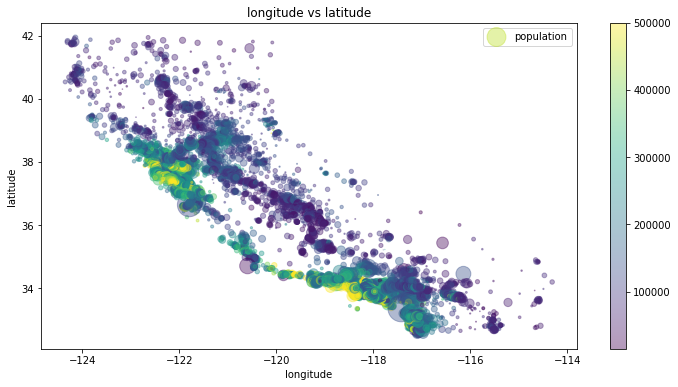

In [17]:
# Scatter plot between longitude and latitude
plt.figure(figsize=(12,6))
sc = plt.scatter(df_housing["longitude"],
                 df_housing["latitude"],
                 alpha=0.4,
                 cmap="viridis",
                 c=df_housing["median_house_value"],
                s=df_housing["population"]/50,
                label='population')
plt.colorbar(sc)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend()
plt.show()

# comment

* > It seems that prices is higher near the ocean than the zones and these areas have higher population.

<b><font size="30" color='red'>Data Preprocessing</font></b>


# housing_median_age Column

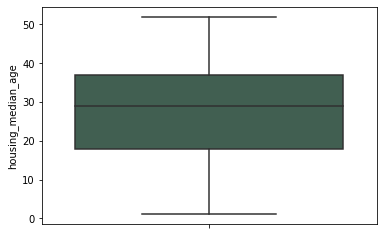

In [18]:
# Boxplot for the housing_median_age to check the outliers
sns.boxplot(y="housing_median_age",data=df_housing,color="#3C6451");

<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>

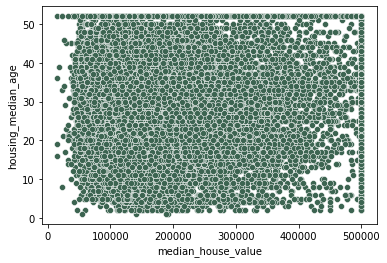

In [19]:
# scatterplot for the housing_median_age with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(x='median_house_value',y="housing_median_age",data=df_housing,color='#3C6451')

## total_bedrooms Column


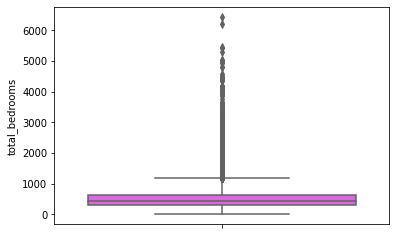

In [20]:
# Boxplot for the total_bedrooms to check the outliers
sns.boxplot(y="total_bedrooms",data=df_housing,color="#EC55F2");

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

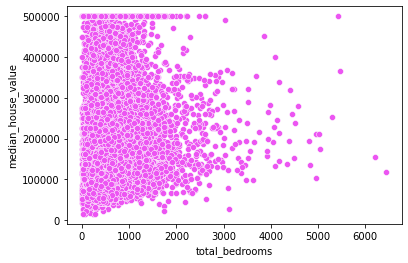

In [21]:
# scatterplot for the total_bedrooms with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="total_bedrooms",data=df_housing,color='#EC55F2')

In [22]:
# Fill the null values in total bedrooms column by random
Fill_total_bedrooms=df_housing["total_bedrooms"].dropna().unique()
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(pd.Series(np.random.choice(Fill_total_bedrooms,size=len(df_housing.index))))

In [23]:
# it seems from the scatter plot to delete from the total_bedrooms column the values higher than 5000 as outliers
df_housing = df_housing[df_housing["total_bedrooms"]<=5000]

##  households Column

<AxesSubplot:ylabel='households'>

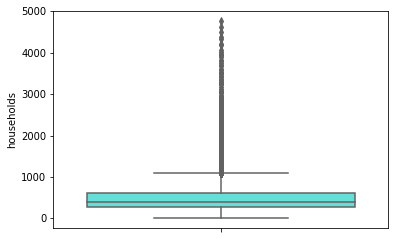

In [24]:
# Boxplot for the households to check the outliers
sns.boxplot(y="households",data=df_housing,color="#51F3E8")

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

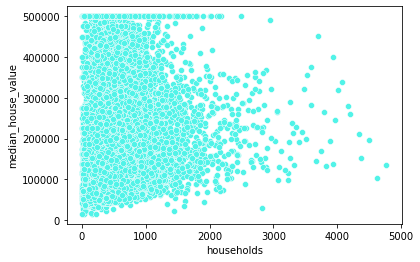

In [25]:
# scatterplot for the households with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="households",data=df_housing,color='#51F3E8')

In [26]:
# it seems from the scatter plot to delete from the households column the values higher than 4000 as outliers
df_housing = df_housing[df_housing["households"]<=4400]

##  population Column


<AxesSubplot:ylabel='population'>

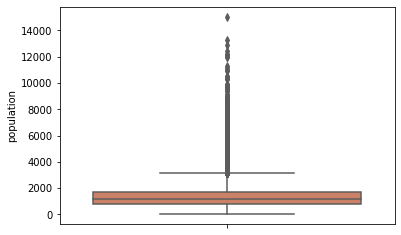

In [27]:
# Boxplot for the population to check the outliers
sns.boxplot(y="population",data=df_housing,color='#DB7958')

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

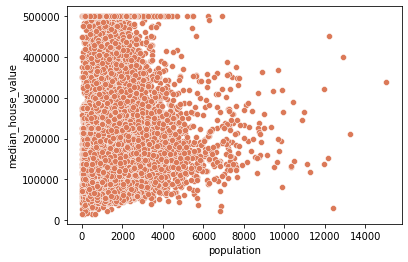

In [28]:
# scatterplot for the housing_median_age with population to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="population",data=df_housing,color='#DB7958')

In [29]:
# it seems from the scatter plot to delete from the population column the values higher than 10000 as outliers
df_housing = df_housing[df_housing["population"]<10000]

# median_income column

<AxesSubplot:ylabel='median_income'>

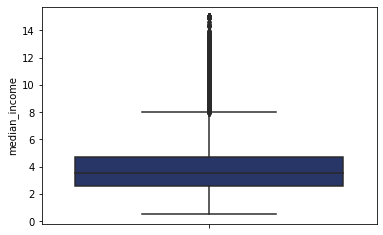

In [30]:
# Boxplot for the median_income to check the outliers
sns.boxplot(y="median_income",data=df_housing,color='#1D3070')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

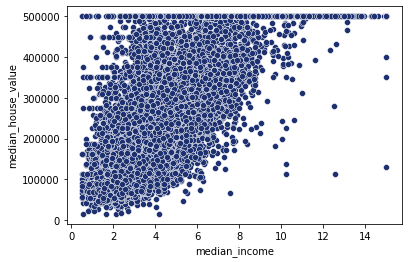

In [31]:
# scatterplot for the median_income with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="median_income",data=df_housing,color='#1D3070')

In [32]:
# it seems from the scatter plot to delete from the median_income column the values higher than 10 as outliers
df_housing = df_housing[df_housing["median_income"]<=12]

# ocean_proximity column

In [33]:
# covert the column ocean_proximity to numeric by labelencoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_housing['ocean_proximity'] = l.fit_transform(df_housing['ocean_proximity'])

<b><font size="25" color='red'>Prediction Part</font></b>


 <b><font color='blue' size=6>Split data</font></b>

In [34]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
house = df_housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

In [36]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
x = house.drop(["median_house_value"],axis=1).values
y= house['median_house_value'].values

<b><font color='blue' size=6>train test split</font></b>

In [37]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [38]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<b><font size="10" color='red'>Data scaling using robust regression</font></b>


In [39]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

<center><b><font size="8" color='red'>Linear regression model</font></b></center>


In [40]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
reg.score(x_train,y_train)

0.5748135842206648

In [42]:
reg.score(x_test,y_test)

0.5759830448836819

In [43]:
reg.intercept_

189045.06534508406

In [44]:
reg.coef_

array([ 35224.02892862, -32907.59218395,  16082.40729225, -40733.52159478,
        64875.87619553, 108513.37040163,   4105.39675261])

In [45]:
pd.DataFrame(reg.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35224.028929
total_rooms,-32907.592184
total_bedrooms,16082.407292
population,-40733.521595
households,64875.876196
median_income,108513.370402
median_house_value,4105.396753


In [46]:
y_pred_1 = reg.predict(x_test)

In [47]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [48]:
df_1.head()

,y_test,Y_pred
0,50000.0,99677.791470
1,60000.0,132200.248758
2,200000.0,126873.505386
3,331900.0,276245.582097
4,450000.0,354488.813516


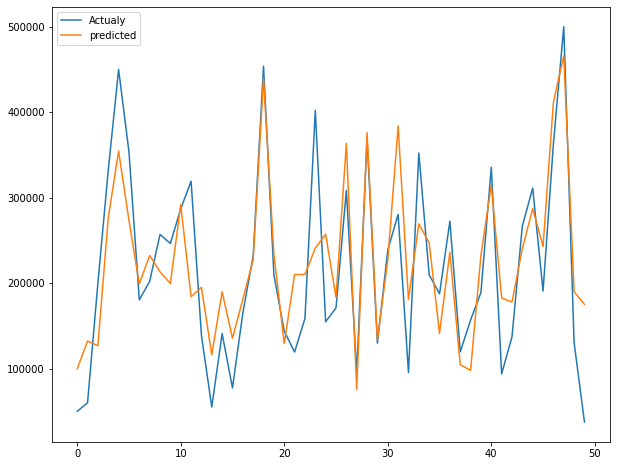

In [49]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

<center><b><font size="25" color='red'>Ridge Model</font></b></center>


In [50]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [51]:
rid.score(x_train,y_train)

0.5748135469145543

In [52]:
rid.score(x_test,y_test)

0.5759755404727784

In [53]:
rid.intercept_

189046.6145138552

In [54]:
rid.coef_

array([ 35220.96436437, -32874.28044686,  16089.00010295, -40709.94269101,
        64812.52528343, 108494.30954718,   4106.25555754])

In [55]:
pd.DataFrame(rid.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35220.964364
total_rooms,-32874.280447
total_bedrooms,16089.000103
population,-40709.942691
households,64812.525283
median_income,108494.309547
median_house_value,4106.255558


In [56]:
y_pred_2 = rid.predict(x_test)

In [57]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [58]:
df_2.head()

,y_test,Y_pred
0,50000.0,99689.756084
1,60000.0,132217.933640
2,200000.0,126888.532922
3,331900.0,276237.948565
4,450000.0,354433.140398


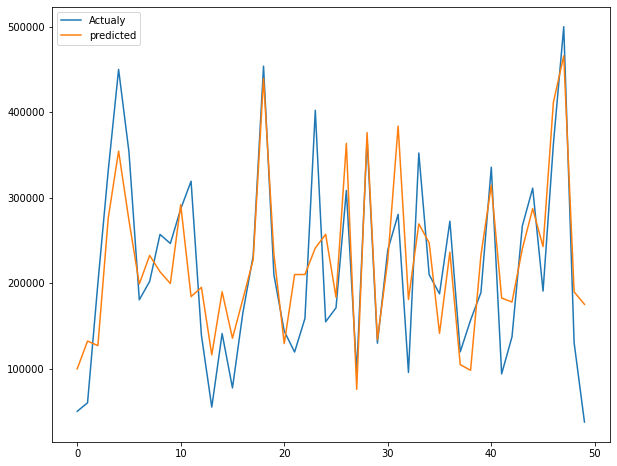

In [59]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actualy","predicted"]);

<center><b><font size="25" color='red'>Lasso Model</font></b></center>

In [60]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.9)
lass.fit(x_train,y_train)

Lasso(alpha=0.9)

In [61]:
lass.score(x_train,y_train)

0.5748135813335272

In [62]:
lass.score(x_test,y_test)

0.5759812674798899

In [63]:
lass.intercept_

189045.62830652518

In [64]:
lass.coef_

array([ 35222.63173276, -32896.46709391,  16077.67999   , -40727.27067202,
        64863.18922941, 108508.52496911,   4105.24957814])

In [65]:
pd.DataFrame(lass.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35222.631733
total_rooms,-32896.467094
total_bedrooms,16077.679990
population,-40727.270672
households,64863.189229
median_income,108508.524969
median_house_value,4105.249578


In [66]:
y_pred_3 = lass.predict(x_test)

In [67]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [68]:
df_3.head()

,y_test,Y_pred
0,50000.0,99681.572237
1,60000.0,132204.784489
2,200000.0,126876.641389
3,331900.0,276245.694794
4,450000.0,354471.407536


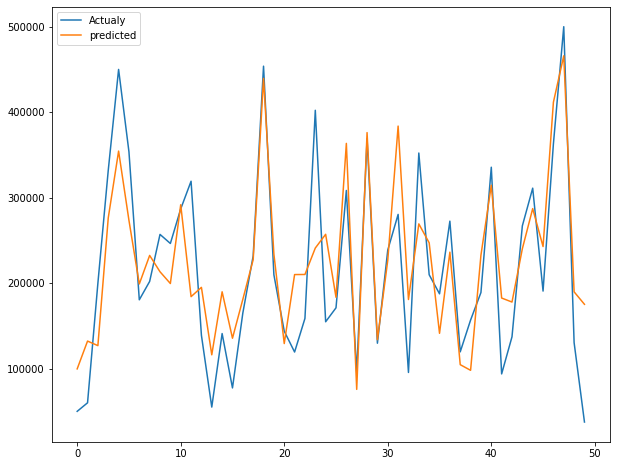

In [69]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actualy","predicted"]);

<center><b><font size="25" color='red'>Evaluating models</font></b></center>


<b><font size="5" color='blue'>Linear reg evaluation</font></b>


In [70]:
#import r2_score 
from sklearn.metrics import r2_score

In [71]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [72]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.5757898960136478

In [73]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [74]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [75]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

5516961202.815454

In [76]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

55264.41748073026

In [77]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.349052135006634

In [78]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

74276.24925112638


<b><font size="5" color='blue'>Ridge Evaluation</font></b>


In [79]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.5759755404727784

In [80]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.5757823881843233

In [81]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [82]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

5517058844.061409

In [83]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

55265.26631666295

In [84]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.34906809728056254

In [85]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

74276.24925112638


<b><font size="5" color='blue'>Lasso Evaluation</font></b>


In [86]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [87]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.57578811780021

In [88]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [89]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

5516984328.937285

In [90]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

55264.61243097365

In [91]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.3490553976864112

In [92]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

74276.24925112638

<b><font size="20" color='red'>Comapring The Three Models</font></b>


In [93]:
models = ["Linear","Ridge","Lasso"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Linear,0.575983,5.516961e+09
Lasso,0.575981,5.516984e+09
Ridge,0.575976,5.517059e+09
